[View in Colaboratory](https://colab.research.google.com/github/uremember809/hello-world/blob/master/simple_mlp.ipynb)

In [0]:
import tensorflow.keras as keras

# New Section

In [32]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title tnt.txt, id 0Bwix1-HHBCMJY0YxcS1rZW5LRlk
title 57488.txt, id 0Bwix1-HHBCMJUnE3SjBNVUUycms


In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [0]:
import matplotlib.pyplot as plt

In [35]:
print(x_train.shape)

(60000, 28, 28)


In [0]:
from itertools import count

In [0]:
def num_gen():
  for i in count():
    yield i

In [0]:
gen = num_gen()

In [39]:
print(next(gen))

0


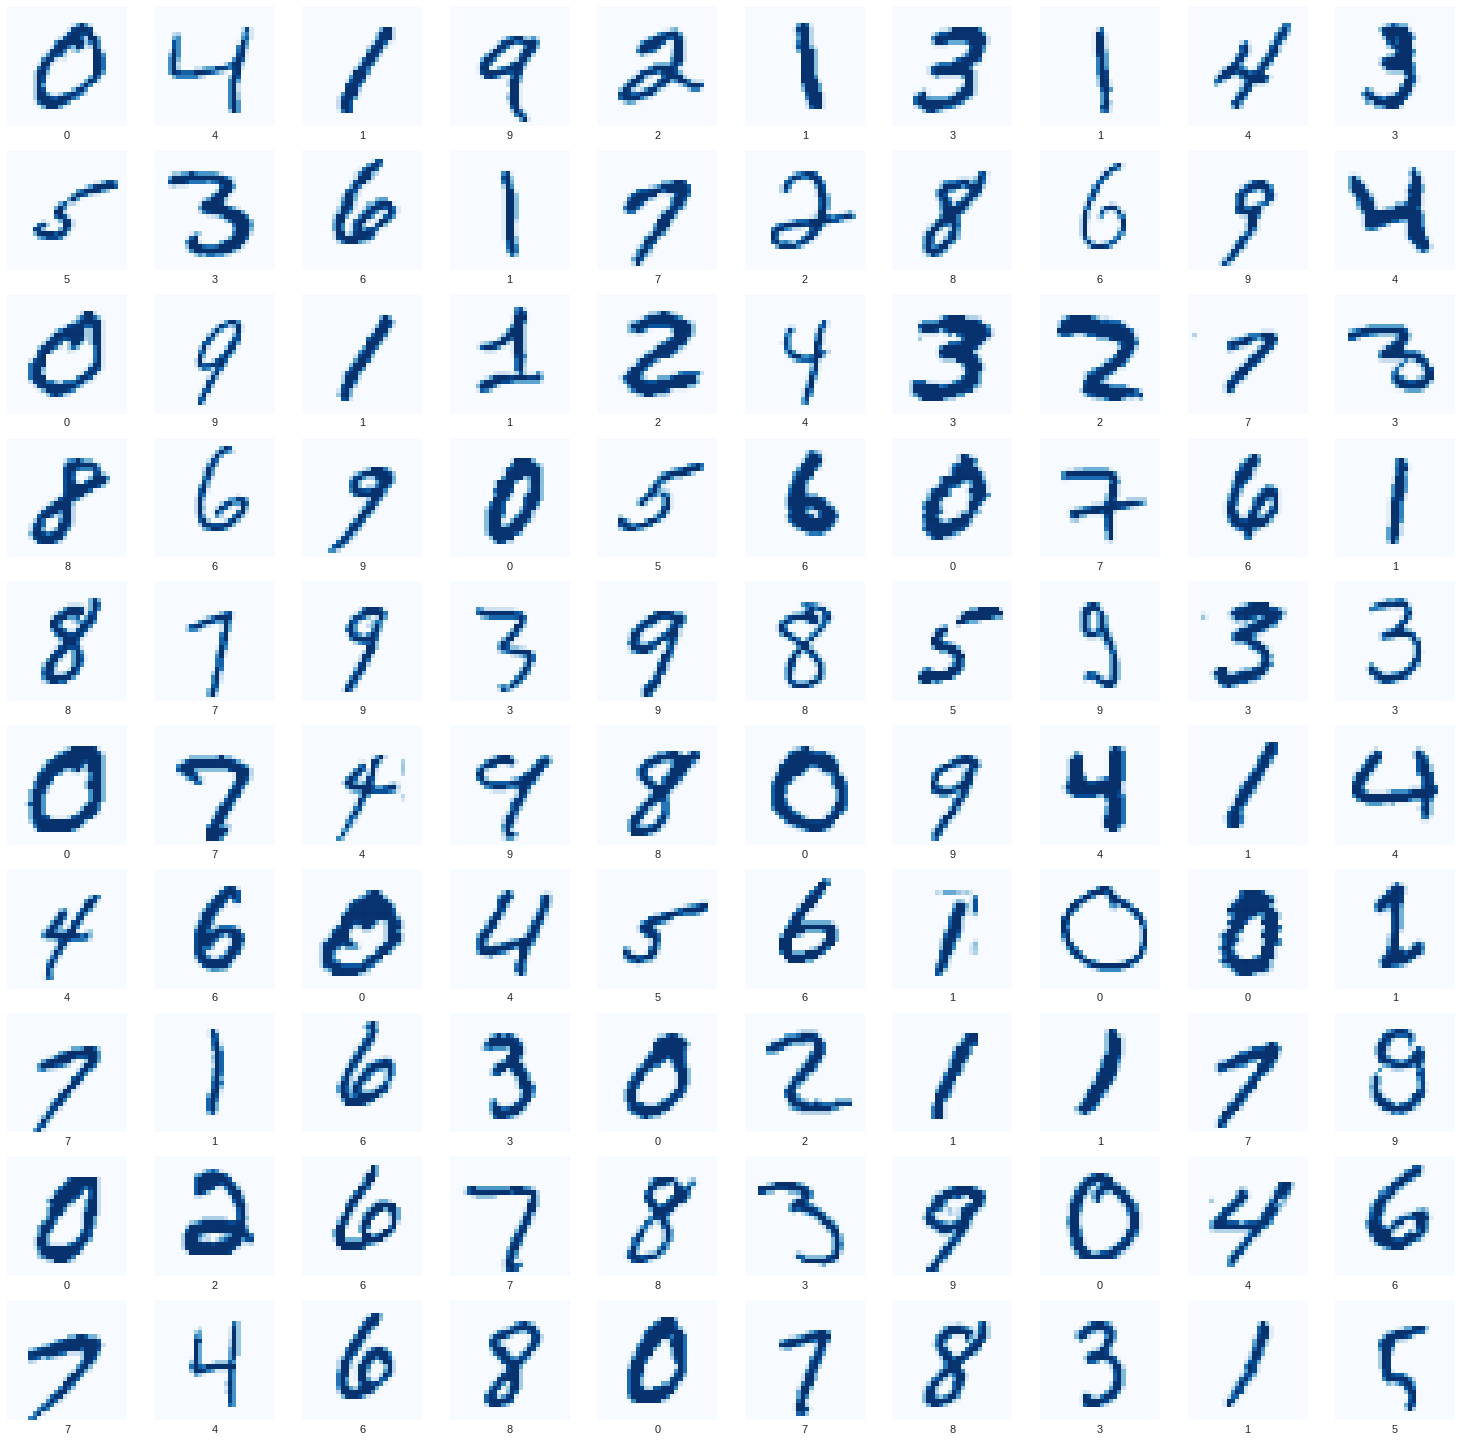

In [40]:
f, a = plt.subplots(10, 10, figsize= (26, 26))
for i in range(10):
  for j in range(10):
    n = next(gen)
    a[i,j].set(xlabel = y_train[n], xticks=[], yticks=[])
    a[i,j].imshow(x_train[n], 'Blues')
  

In [0]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [0]:
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

In [43]:
print(x_train.shape)

(60000, 784)


In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [45]:
print(y_test.shape)

(10000, 10)


In [0]:
model = keras.models.Sequential()

In [0]:
model.add(keras.layers.Dense(64, input_shape = (784,), activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [67]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 76,362
Trainable params: 76,362
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adadelta(),
    metrics=["accuracy"],
)

In [69]:
model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 53us/step - loss: 0.3530 - acc: 0.8909 - val_loss: 0.1633 - val_acc: 0.9488
Epoch 2/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.1360 - acc: 0.9589 - val_loss: 0.1201 - val_acc: 0.9625
Epoch 3/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0980 - acc: 0.9698 - val_loss: 0.1020 - val_acc: 0.9674
Epoch 4/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0768 - acc: 0.9759 - val_loss: 0.1125 - val_acc: 0.9647
Epoch 5/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0617 - acc: 0.9803 - val_loss: 0.0808 - val_acc: 0.9762
Epoch 6/30
60000/60000 [==============================] - 3s 45us/step - loss: 0.0523 - acc: 0.9839 - val_loss: 0.0873 - val_acc: 0.9746
Epoch 7/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0437 - acc: 0.9863 - val_loss: 0.0763 - val_acc

In [51]:
pwd

'/content/sample_data'

In [52]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [53]:
cd sample_data/


[Errno 2] No such file or directory: 'sample_data/'
/content/sample_data


In [54]:
ls

anscombe.json*                mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md*


In [0]:
import sklearn

In [0]:
from sklearn import linear_model

In [0]:
lr = linear_model.LinearRegression()

In [58]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lr.predict(x_test[:5])

array([[ 0.02770996,  0.00618298,  0.10599657,  0.10259679, -0.1159902 ,
        -0.01106006, -0.01830345,  0.90483026, -0.08458398,  0.08052321],
       [ 0.22320641, -0.22880441,  0.83245182,  0.09780189, -0.32992499,
         0.19810845,  0.35895294, -0.03022792, -0.03165879, -0.08944242],
       [ 0.04248971,  0.74501389,  0.04331953,  0.00679888,  0.07050311,
         0.0449985 ,  0.03178257,  0.05719448, -0.0595306 ,  0.01892609],
       [ 0.84072335,  0.00105318,  0.04784499, -0.04260717, -0.10381702,
         0.04649468,  0.13272804,  0.16167381, -0.0288536 , -0.0578812 ],
       [-0.01696701,  0.06665367,  0.13048889,  0.00608552,  0.58813382,
         0.05001348,  0.01480041,  0.05139373,  0.0036184 ,  0.10502064]])

In [64]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [60]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10942510111229447919]